# Simple Linear Regression 
A supervised learning approach ahs following elements :
- inputs/$X$
- target/label/ $y$ 
- weights / $\theta$ or $w$
- biases / $\theta_0$ or $b$
- output / $\hat{y}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D # for 3D graphs
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

## Generate random input data to train on 

In [2]:
n = 1000 #

x = np.random.uniform(low=-10,high=10, size=(n, 1))
z = np.random.uniform(-10,10, (n, 1))

inputs = np.column_stack((x,z))

inputs.shape


(1000, 2)

## Create the targets

Let's assum the function is below that we want our algorithm to learn :

$f(x,z) = 2*x - 3*z + 5 + noise$
- weights 2, 3
- bias = 5 
- noise = introduced to randomize our data a bit. real data always have noise
- two variable problem in linear algebra

In [3]:
noise = np.random.uniform(-1,1, (n,1))

In [4]:
y  = 2*x - 3*z + 5 + noise
y.shape

(1000, 1)

In [5]:
#f(x,z) = 13*xs + 7*zs - 12
#y = 13*x + 7*z - 12 + noise
#y.shape

## Plot the training data

- linear relationshiop in 2D is a straight line
- linear relationship in 3D is a plane 

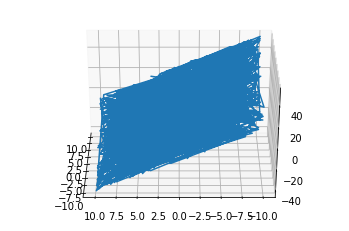

In [6]:

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.plot(x,z,y.reshape(n, ))
ax.view_init(azim =180)
# plt.plot(x, y)
# plt.plot(z,y)
plt.show()

## Initialize Weights/Biases

- Recall from GD that we start from an arbitrary number and then proceed. 
- randomly select small initial weights 
- pick weights and biases randomly between interval [-0.1, 0.1]


In [7]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, (2,1))
bias = np.random.uniform(-init_range, size=1)

bias = bias.reshape(1, -1)
print (weights)
print (bias)

[[-0.0401559 ]
 [-0.03329407]]
[[0.53465638]]


## Set a learning rate 

In [8]:
learning_rate = 0.02
learning_rate

0.02

## Train the model
- iterative problem
    - calculate the output 
    - compare outputs to targets through the loss
    - adjust weights and biases
<br>
<br>
- things to modify :
    - number of observations
    - learning rate 
    - number of iterations
    - initial range for initializing weights and biases

In [9]:
inputs.shape, weights.shape, bias.shape, y.shape

((1000, 2), (2, 1), (1, 1), (1000, 1))

In [10]:
for i in range(500):
    y_hat = np.dot(inputs, weights) + bias # output 
    delta = (y_hat - y)
    
    l2_norm_div_n = np.sum(delta ** 2) / (2 * n)
    l2_norm = np.sum(delta ** 2)
    l1_norm = np.sum(np.abs(delta))
    
    print(l2_norm_div_n, l2_norm, l1_norm)
    
    delta_scaled = delta / n

    weights = weights - learning_rate * np.dot(inputs.T , delta_scaled)
    bias = bias - learning_rate * np.sum(delta_scaled)
    

242.31187180979163 484623.74361958326 18074.408704594185
30.0386157305518 60077.2314611036 6328.038822709824
11.121845084818485 22243.69016963697 4326.001149000683
9.106928753618435 18213.85750723687 4193.988015207842
8.610996158283644 17221.992316567288 4098.404074083005
8.265205985876568 16530.411971753136 4013.618472842374
7.945077800482753 15890.155600965507 3932.8814375151874
7.638690120443602 15277.380240887205 3854.376230042781
7.344484018737275 14688.968037474551 3777.598401192555
7.061883474882512 14123.766949765024 3702.392066496631
6.790421960804564 13580.843921609128 3628.6939794662217
6.529659583339076 13059.319166678153 3556.465748610767
6.2791745760542685 12558.349152108538 3485.675938078719
6.038561871448084 12077.123742896169 3416.295353680382
5.8074323741808485 11614.864748361697 3348.2958012921117
5.58541232494001 11170.82464988002 3281.6497557071325
5.372142695362794 10744.285390725589 3216.3302669998634
5.167278607386577 10334.557214773155 3152.3109285449364
4.9704

0.17422825684341636 348.45651368683275 514.0897017404214
0.1742282469716831 348.4564939433662 514.0896311853235
0.17422823748902191 348.45647497804384 514.0895620345871
0.17422822838009844 348.4564567601969 514.0894942602592
0.17422821963018265 348.4564392603653 514.0894278349433
0.17422821122512505 348.4564224502501 514.0893627317877
0.17422820315133383 348.4564063026677 514.0892989244758
0.17422819539575296 348.4563907915059 514.0892363872143
0.17422818794584072 348.45637589168143 514.0891750947237
0.17422818078955007 348.45636157910013 514.0891150222275
0.17422817391530845 348.4563478306169 514.0890561454422
0.1742281673119996 348.4563346239992 514.088998440568
0.1742281609689452 348.4563219378904 514.0889418842784
0.17422815487588802 348.4563097517761 514.0888864537117
0.17422814902297495 348.4562980459499 514.0888321264608
0.1742281434007412 348.4562868014824 514.0887788805647
0.17422813800009526 348.45627600019054 514.0887266945001
0.1742281328123035 348.456265624607 514.08867554

## Check weights and biases

In [11]:
# check if its equal to the original equation 
weights , bias

(array([[ 1.99566205],
        [-3.00560224]]),
 array([[5.01700638]]))

## plot output vs target 

- the closer the plot is to 45 degree line the closer the outputs are to the targets 

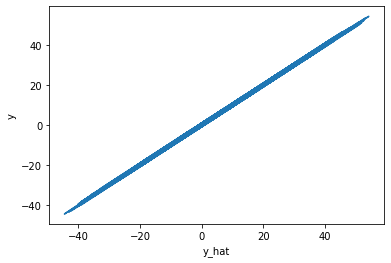

In [12]:

plt.plot(y_hat, y)
plt.xlabel('y_hat')
plt.ylabel('y')
plt.show()